# Import Necessary Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

# Understand the Dataset

In [2]:
df=pd.read_csv('Stock_data.csv', encoding='utf-8')
df.head()

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2008-08-08,0,"b""Georgia 'downs two Russian warplanes' as cou...",b'BREAKING: Musharraf to be impeached.',b'Russia Today: Columns of troops roll into So...,b'Russian tanks are moving towards the capital...,"b""Afghan children raped with 'impunity,' U.N. ...",b'150 Russian tanks have entered South Ossetia...,"b""Breaking: Georgia invades South Ossetia, Rus...","b""The 'enemy combatent' trials are nothing but...",...,b'Georgia Invades South Ossetia - if Russia ge...,b'Al-Qaeda Faces Islamist Backlash',"b'Condoleezza Rice: ""The US would not act to p...",b'This is a busy day: The European Union has ...,"b""Georgia will withdraw 1,000 soldiers from Ir...",b'Why the Pentagon Thinks Attacking Iran is a ...,b'Caucasus in crisis: Georgia invades South Os...,b'Indian shoe manufactory - And again in a se...,b'Visitors Suffering from Mental Illnesses Ban...,"b""No Help for Mexico's Kidnapping Surge"""
1,2008-08-11,1,b'Why wont America and Nato help us? If they w...,b'Bush puts foot down on Georgian conflict',"b""Jewish Georgian minister: Thanks to Israeli ...",b'Georgian army flees in disarray as Russians ...,"b""Olympic opening ceremony fireworks 'faked'""",b'What were the Mossad with fraudulent New Zea...,b'Russia angered by Israeli military sale to G...,b'An American citizen living in S.Ossetia blam...,...,b'Israel and the US behind the Georgian aggres...,"b'""Do not believe TV, neither Russian nor Geor...",b'Riots are still going on in Montreal (Canada...,b'China to overtake US as largest manufacturer',b'War in South Ossetia [PICS]',b'Israeli Physicians Group Condemns State Tort...,b' Russia has just beaten the United States ov...,b'Perhaps *the* question about the Georgia - R...,b'Russia is so much better at war',"b""So this is what it's come to: trading sex fo..."
2,2008-08-12,0,b'Remember that adorable 9-year-old who sang a...,"b""Russia 'ends Georgia operation'""","b'""If we had no sexual harassment we would hav...","b""Al-Qa'eda is losing support in Iraq because ...",b'Ceasefire in Georgia: Putin Outmaneuvers the...,b'Why Microsoft and Intel tried to kill the XO...,b'Stratfor: The Russo-Georgian War and the Bal...,"b""I'm Trying to Get a Sense of This Whole Geor...",...,b'U.S. troops still in Georgia (did you know t...,b'Why Russias response to Georgia was right',"b'Gorbachev accuses U.S. of making a ""serious ...","b'Russia, Georgia, and NATO: Cold War Two'",b'Remember that adorable 62-year-old who led y...,b'War in Georgia: The Israeli connection',b'All signs point to the US encouraging Georgi...,b'Christopher King argues that the US and NATO...,b'America: The New Mexico?',"b""BBC NEWS | Asia-Pacific | Extinction 'by man..."
3,2008-08-13,0,b' U.S. refuses Israel weapons to attack Iran:...,"b""When the president ordered to attack Tskhinv...",b' Israel clears troops who killed Reuters cam...,b'Britain\'s policy of being tough on drugs is...,b'Body of 14 year old found in trunk; Latest (...,b'China has moved 10 *million* quake survivors...,"b""Bush announces Operation Get All Up In Russi...",b'Russian forces sink Georgian ships ',...,b'Elephants extinct by 2020?',b'US humanitarian missions soon in Georgia - i...,"b""Georgia's DDOS came from US sources""","b'Russian convoy heads into Georgia, violating...",b'Israeli defence minister: US against strike ...,b'Gorbachev: We Had No Choice',b'Witness: Russian forces head towards Tbilisi...,b' Quarter of Russians blame U.S. for conflict...,b'Georgian president says US military will ta...,b'2006: Nobel laureate Aleksander Solzhenitsyn...
4,2008-08-14,1,b'All the experts admit that we should legalis...,b'War in South Osetia - 89 pictures made by a ...,b'Swedish wrestler Ara Abrahamian throws away ...,b'Russia exaggerated the death toll in South O...,b'Missile That Killed 9 Inside Pakistan May Ha...,"b""Rushdie Condemns Random House's Refusal to P...",b'Poland and US agree 

In [3]:
#shape of the dataset
df.shape

(1989, 27)

In [205]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1989 entries, 0 to 1988
Data columns (total 27 columns):
Date     1989 non-null object
Label    1989 non-null int64
Top1     1989 non-null object
Top2     1989 non-null object
Top3     1989 non-null object
Top4     1989 non-null object
Top5     1989 non-null object
Top6     1989 non-null object
Top7     1989 non-null object
Top8     1989 non-null object
Top9     1989 non-null object
Top10    1989 non-null object
Top11    1989 non-null object
Top12    1989 non-null object
Top13    1989 non-null object
Top14    1989 non-null object
Top15    1989 non-null object
Top16    1989 non-null object
Top17    1989 non-null object
Top18    1989 non-null object
Top19    1989 non-null object
Top20    1989 non-null object
Top21    1989 non-null object
Top22    1989 non-null object
Top23    1988 non-null object
Top24    1986 non-null object
Top25    1986 non-null object
dtypes: int64(1), object(26)
memory usage: 419.6+ KB


In [4]:
#checking for null values in the dataset
df.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    1
Top24    3
Top25    3
dtype: int64

In [5]:
#checking for duplicate values in the dataset

df[df.duplicated()]

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25


In [6]:
#description of the data
df.describe()

,Label
count,1989.000000
mean,0.535445
std,0.498867
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,1.000000


In [7]:
#dropping all the null values
df.dropna(inplace=True)

In [8]:
df.isna().sum()

Date     0
Label    0
Top1     0
Top2     0
Top3     0
Top4     0
Top5     0
Top6     0
Top7     0
Top8     0
Top9     0
Top10    0
Top11    0
Top12    0
Top13    0
Top14    0
Top15    0
Top16    0
Top17    0
Top18    0
Top19    0
Top20    0
Top21    0
Top22    0
Top23    0
Top24    0
Top25    0
dtype: int64

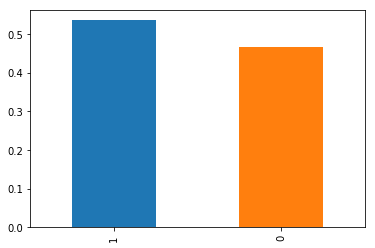

In [9]:
#Plotting the target labels
df['Label'].value_counts(normalize=True).plot(kind='bar')

# Train Test Split

In [64]:
train = df[df['Date'] < '20150101']
test = df[df['Date'] > '20141231']

In [65]:
train.shape,test.shape

((1860, 27), (378, 27))

# Preprocessing the training data

In [66]:
data=train.iloc[:,2:27]

In [67]:
headlines=[]

In [68]:
#replacing all the other letters except a-z and A-Z
data.replace('[^a-zA-Z]',' ',regex=True,inplace=True)

In [69]:
for i in range(len(data)):
    single=' '.join(data.iloc[i,:])
    single=single.lower()
    headlines.append(single)

In [70]:
len(headlines)

1860

In [84]:
vec=CountVectorizer(ngram_range=(1,1))
X_train=vec.fit_transform(headlines)

In [85]:
y_train=train['Label']

In [86]:
X_train.shape,y_train.shape

((1860, 32350), (1860,))

# Model Creation

In [74]:
rfc=RandomForestClassifier(n_estimators=200,criterion='entropy')
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [75]:
test_data=[]

In [76]:
test.head(2)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
1611,2015-01-02,1,Most cases of cancer are the result of sheer b...,Iran dismissed United States efforts to fight ...,Poll: One in 8 Germans would join anti-Muslim ...,UK royal family's Prince Andrew named in US la...,Some 40 asylum-seekers refused to leave the bu...,Pakistani boat blows self up after India navy ...,Sweden hit by third mosque arson attack in a week,940 cars set alight during French New Year,...,Ukrainian minister threatens TV channel with c...,Palestinian President Mahmoud Abbas has entere...,Israeli security center publishes names of 50 ...,The year 2014 was the deadliest year yet in Sy...,A Secret underground complex built by the Nazi...,Restrictions on Web Freedom a Major Global Iss...,Austrian journalist Erich Mchel delivered a pr...,Thousands of Ukraine nationalists march in Kiev,Chinas New Years Resolution: No More Harvestin...,Authorities Pull Plug on Russia's Last Politic...
1612,2015-01-05,0,Moscow-&gt;Beijing high speed train will reduc...,Two ancient tombs were discovered in Egypt on ...,China complains to Pyongyang after N Korean so...,Scotland Headed Towards Being Fossil Fuel-Free...,Prime Minister Shinzo Abe said Monday he will ...,Sex slave at centre of Prince Andrew scandal f...,Gay relative of Hamas founder faces deportatio...,The number of female drug addicts in Iran has ...,...,The Islamic State has approved a 2015 budget o...,"Iceland To Withdraw EU Application, Lift Capit...",Blackfield Capital Founder Goes Missing: The v...,Rocket stage crashes back to Earth in rural Ch...,2 Dead as Aircraft Bombs Greek Tanker in Libya...,Belgian murderer Frank Van Den Bleeken to die ...,Czech President criticizes Ukrainian PM; says ...,3 Vietnamese jets join search for 16 missing F...,France seeks end to Russia sanctions over Ukraine,China scraps rare earths caps


In [77]:
#preparing the test data

for i in range(len(test)):
    single=' '.join(test.iloc[i,2:27])
    single=single.lower()
    test_data.append(single)

In [78]:
len(test_data)

378

In [79]:
X_test=vec.transform(test_data)
y_test=test['Label']

In [80]:
X_test.shape

(378, 403558)

In [81]:
#predicting the output for the test data
y_pred=rfc.predict(X_test)

In [82]:
accuracy_score(y_test,y_pred)

0.8544973544973545

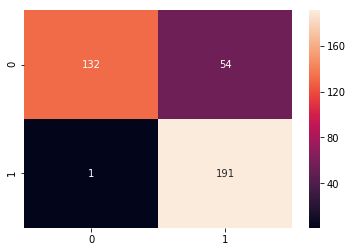

In [83]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='.0f')